In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import simple_graph_modified as gs
import Homework04 as gss

In [2]:
img_size=  (480, 640) 

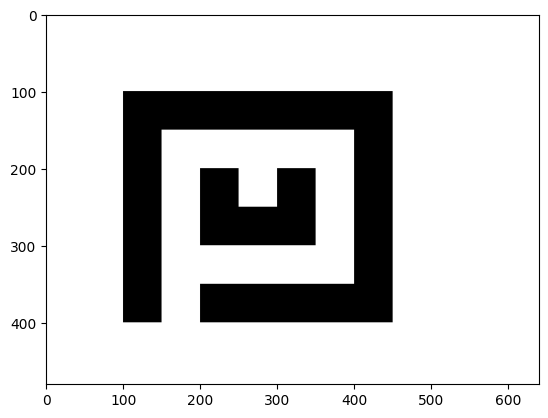

In [123]:
obstacle_1 = np.ones(img_size, dtype=np.uint8)*255
obstacle_1[100:150, 100:450] = 0
obstacle_1[150:400, 150:150] = 0
obstacle_1[150:400, 400:450] = 0
obstacle_1[350:400, 200:400] = 0
obstacle_1[100:400, 100:150] = 0
obstacle_1[200:300, 200:250] = 0
obstacle_1[250:300, 250:300] = 0
obstacle_1[200:300, 300:350] = 0
plt.imshow(obstacle_1, cmap='gray')

In [4]:
obstacle_1[0: 10, 0:10].sum()%255

np.uint64(0)

In [ ]:
left, right = np.arange(0, img_size[1], 10), np.arange(10, img_size[1]+10, 10)


In [99]:
# h = 0
# points = []
# for i in range(img_size[0]):
#     for j in range(img_size[1]):
#         if obstacle_1[i,j] == 100:
#             points.append((i, j, len(graph)))
#         if obstacle_1[i,j] != 0:
#             graph.append(gs.Node(h, i, j))
#         else:
#             graph.append(None)
#         if ((640*i)+j)%640!=0 and graph[h-1] and graph[h]:
#             graph[h-1].addUndirectedNeighbor(graph[h])
#         if i!=0 and graph[640*(i-1)+j] and graph[h]:
#             graph[h].addUndirectedNeighbor(graph[640*(i-1)+j])
#         h+=1

In [ ]:
# h = 0
# points = []
# kernel_size = 10
# stride = 1
# for i in range(img_size[0]//stride):
#     for j in range(img_size[1]//stride):
#         if obstacle_1[ stride * i: kernel_size +  stride * i,  stride * j: kernel_size + stride * j].sum() == (255*kernel_size*kernel_size):
#             graph.append(gs.Node(h, stride * i, kernel_size +  stride * i, stride * j, kernel_size + stride * j))
#         else:
#             graph.append(None)
#         if (((img_size[1] //  stride) * i) + j )% (img_size[1]//stride) != 0 and graph[h - 1] and graph[h]:
#             graph[h - 1].addUndirectedNeighbor(graph[h])
#         if i != 0 and graph[img_size[1] // stride * (i - 1) + j] and graph[h]:
#             graph[h].addUndirectedNeighbor(graph[img_size[1] // stride * (i - 1) + j])
#         h += 1

In [ ]:
h = 0
graph = []
points = []
kernel_size = 10
stride = 10
for i in range(img_size[0]//stride):
    for j in range(img_size[1]//stride):
        if obstacle_1[ stride * i: kernel_size +  stride * i,  stride * j: kernel_size + stride * j].sum() == (255*kernel_size*kernel_size):
            graph.append(gs.Node(h, stride * i, kernel_size +  stride * i, stride * j, kernel_size + stride * j))
        else:
            graph.append(None)
        if (((img_size[1] //  stride) * i) + j )% (img_size[1]//stride) != 0 and graph[h - 1] and graph[h]:
            graph[h - 1].addUndirectedNeighbor(graph[h])
        if i != 0 and graph[img_size[1] // stride * (i - 1) + j] and graph[h]:
            graph[h].addUndirectedNeighbor(graph[img_size[1] // stride * (i - 1) + j])
        if i != 0 and (((img_size[1] //  stride) * i) + j )% (img_size[1]//stride) != 0  and graph[img_size[1] // stride * (i - 1) + j-1] and graph[h]:
            graph[h].addUndirectedNeighbor(graph[img_size[1] // stride * (i - 1) + j - 1])
        if i != 0 and (((img_size[1] //  stride) * i) + j ) - ((img_size[1] //  stride) * i) != ((img_size[1]-stride)//stride)  and graph[img_size[1] // stride * (i - 1) + j + 1] and graph[h]:
            graph[h].addUndirectedNeighbor(graph[img_size[1] // stride * (i - 1) + j + 1])
        h += 1

hello 1 63 63 63


In [110]:
len(graph)

3072

In [96]:
graph[1307].get_coordinates()

(200, 210, 270, 280)

In [120]:
for i in graph[64].neighbors():
    print(i.id())

0
65
128
129


In [136]:
for i in graph[64].neighbors():
    print(i.id())

0
1
65
127
128
129


In [57]:
obstacle_ref = np.zeros_like(obstacle_1, dtype=np.uint8)
for node in graph:
    if node:
        y1, y2, x1,x2 = node.get_coordinates()
        obstacle_ref[y1:y2, x1:x2] = 1

In [58]:
obstacle_ref

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

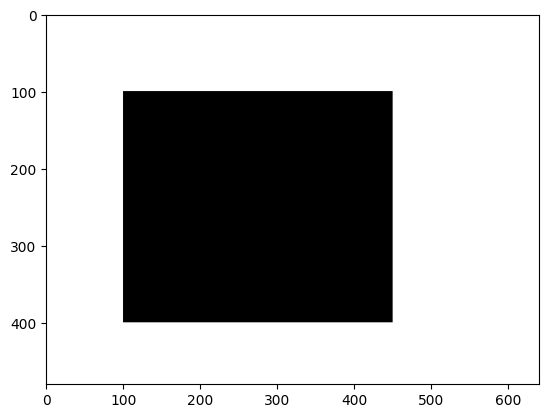

In [59]:
plt.imshow(obstacle_ref, cmap='gray')

In [12]:
# for i in range(img_size[0]//10):
#     for j in range(len(left)):
        
#         if left[i]>= 100 and right[i] <= 150 and left[j]>= 100 and right[j] <= 450:
#             graph.append(gs.Node((64*i)+j, left[i], right[i], left[j], right[j], 0))
#             continue
#         elif left[i]>= 150 and right[i] <= 400 and left[j]>= 150 and right[j] <= 150:
#             graph.append(gs.Node((64*i)+j, left[i], right[i], left[j], right[j], 0))
#             continue
#         elif left[i]>= 150 and right[i] <= 400 and left[j]>= 400 and right[j] <= 450:
#             graph.append(gs.Node((64*i)+j, left[i], right[i], left[j], right[j], 0))
#             continue
#         elif left[i]>= 350 and right[i] <= 400 and left[j]>= 200 and right[j] <= 400:
#             graph.append(gs.Node((64*i)+j, left[i], right[i], left[j], right[j], 0 ))
#             continue
#         elif left[i]>= 100 and right[i] <= 400 and left[j]>= 100 and right[j] <= 150:
#             graph.append(gs.Node((64*i)+j, left[i], right[i], left[j], right[j] , 0))
#             continue
#         elif left[i]>= 200 and right[i] <= 300 and left[j]>= 200 and right[j] <= 250:
#             graph.append(gs.Node((64*i)+j, left[i], right[i], left[j], right[j], 0  ))
#             continue
#         elif left[i]>= 250 and right[i] <= 300 and left[j]>= 250 and right[j] <= 300:
#             graph.append(gs.Node((64*i)+j, left[i], right[i], left[j], right[j], 0))
#             continue
#         elif left[i]>= 200 and right[i] <= 300 and left[j]>= 300 and right[j] <= 350:
#             graph.append(gs.Node((64*i)+j, left[i], right[i], left[j], right[j], 0))
#             continue


#         if ((64*i)+j)%64==0:
#             graph.append(gs.Node((64*i)+j, left[i], right[i], left[j], right[j], 1))
#         else:
#             graph.append(gs.Node((64*i)+j, left[i], right[i], left[j], right[j], 1))
#             graph[(64*i)+j-1].addUndirectedNeighbor(graph[(64*i)+j])   
        
#         if i!=0:
#             graph[(64*i)+j].addUndirectedNeighbor(graph[64*(i-1)+j])

In [13]:
# print("Graph:")
# for node in graph:
#     s = "["
#     if node.val() == 0:
#         for n in node.neighbors():
#             s += str(n) + ", "
#         s += "]"
#         print(node, s)
    
# print(graph[2].pre())

In [74]:
len(graph)

307200

In [16]:
print(graph[points[1][-1]])

144275 (225, 275) inf -> -1


In [110]:
obstacle_1[200: 225, 275: 300] = 100

In [103]:
gss.bfs(graph, verbose=False)

In [79]:
graph[128900].get_coordinates()

(201, 211, 260, 270)

In [80]:
graph[128900].visited()

True

In [104]:
node = graph[1307]
while node.parent()!=-1:
    # print(node.parent().id())
    node = node.parent()
    y1, y2, x1,x2 = node.get_coordinates()
    obstacle_1[y1:y2, x1:x2] = 70
    

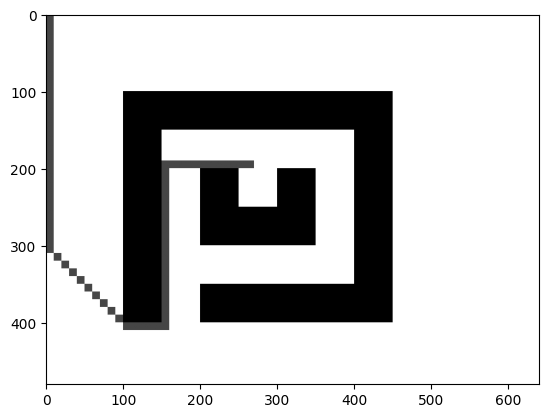

In [105]:
plt.imshow(obstacle_1, cmap='gray')